In [1]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Processed Data
df = pd.read_csv('../scraped_reviews/analysed_reviews.csv')
df.head()

,review_text,rating,date,bank_name,source,sentiment,sentiment_score,cleaned_text,assigned_topic
0,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,Bank of Abyssinia,Google Play,negative,-1,hello facing problem boa mobile app time enter...,0
1,this is worest app 24/7 loading,1,2025-06-01,Bank of Abyssinia,Google Play,negative,-1,worest app 24/7 loading,2
2,This App is not interest for Android phone Ple...,1,2025-06-01,Bank of Abyssinia,Google Play,negative,-1,app not interest android phone update,4
3,BoA system is confartable,5,2025-06-01,Bank of Abyssinia,Google Play,negative,-1,boa system confartable,0
4,"this app, for me , is a waste of time. It does...",1,2025-05-27,Bank of Abyssinia,Google Play,negative,-1,app waste time work long piss fix problem,2


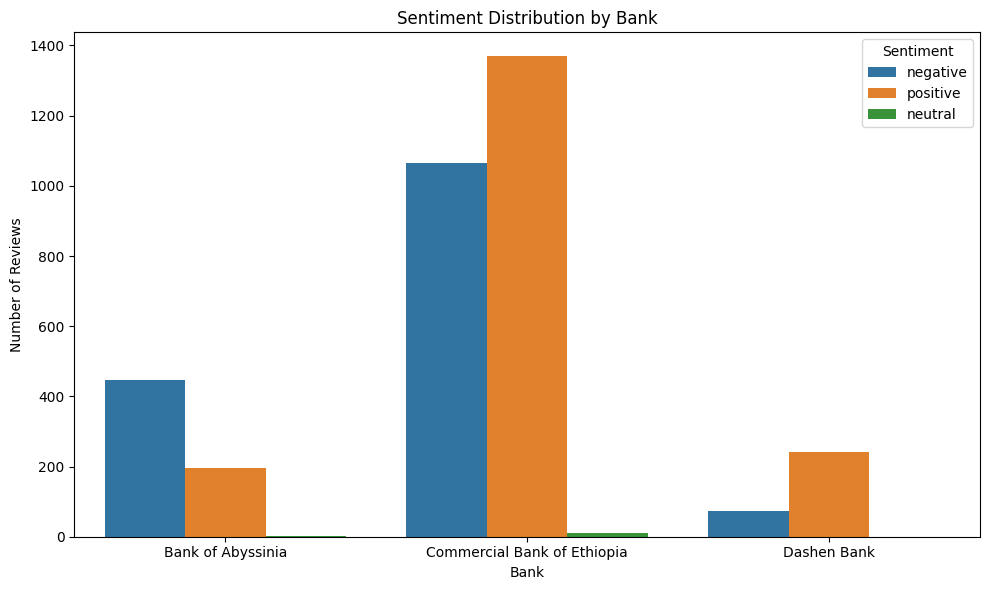

In [6]:
# Sentiment Distribution by Bank

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bank_name', hue='sentiment')
plt.title("Sentiment Distribution by Bank")
plt.xlabel("Bank")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

In [5]:
df.columns

Index(['review_text', 'rating', 'date', 'bank_name', 'source', 'sentiment',
       'sentiment_score', 'cleaned_text', 'assigned_topic'],
      dtype='object')

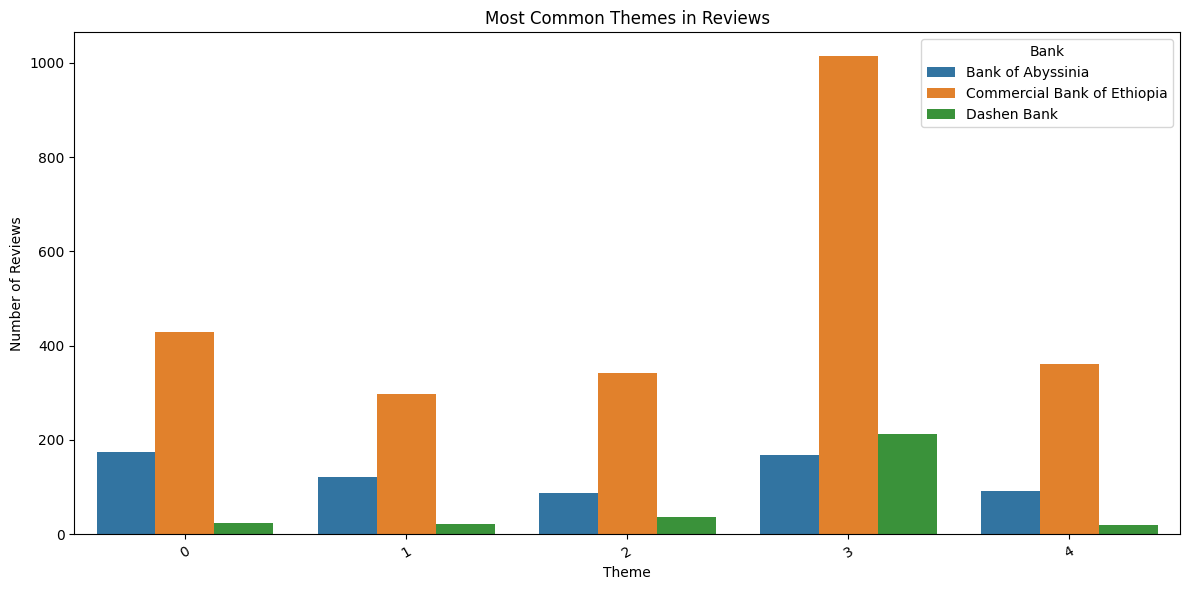

In [8]:
# Themes Distribution by Bank
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='assigned_topic', hue='bank_name')
plt.title("Most Common Themes in Reviews")
plt.xticks(rotation=30)
plt.xlabel("Theme")
plt.ylabel("Number of Reviews")
plt.legend(title="Bank")
plt.tight_layout()
plt.show()

In [10]:
# Sentiment by Theme and Bank
sentiment_theme = df.groupby(['bank_name', 'assigned_topic', 'sentiment']).size().reset_index(name='count')
sentiment_pivot = sentiment_theme.pivot_table(index=['bank_name', 'assigned_topic'], columns='sentiment', values='count', fill_value=0)
sentiment_pivot

sentiment                                   negative  neutral  positive
bank_name                   assigned_topic                             
Bank of Abyssinia           0                  153.0      1.0      20.0
                            1                  106.0      0.0      16.0
                            2                   70.0      0.0      17.0
                            3                   49.0      0.0     120.0
                            4                   70.0      0.0      22.0
Commercial Bank of Ethiopia 0                  293.0      1.0     135.0
                            1                  219.0      2.0      77.0
                            2                  227.0      4.0     110.0
                            3                  121.0      2.0     891.0
                            4                  204.0      1.0     156.0
Dashen Bank                 0                   13.0      0.0      11.0
                            1                   10.0      0.0      12.0
                            2                   25.0      0.0      12.0
                            3                   18.0      0.0     194.0
                            4                    7.0      0.0      13.0

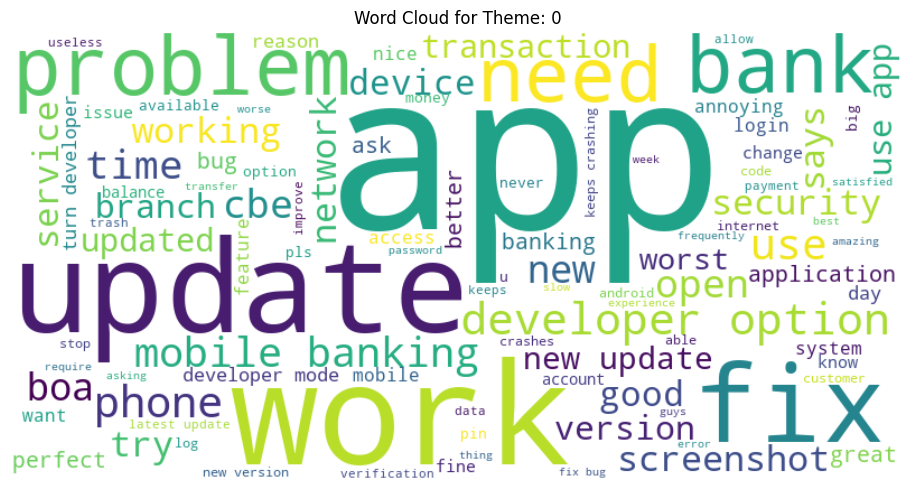

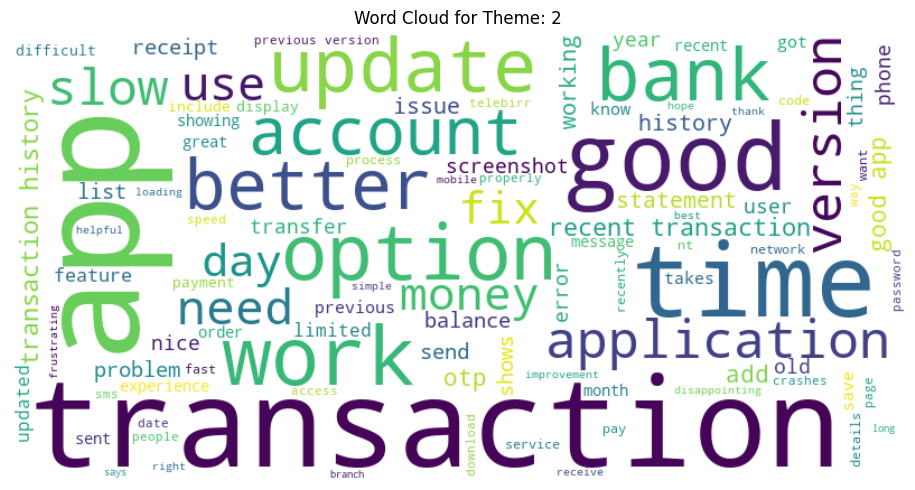

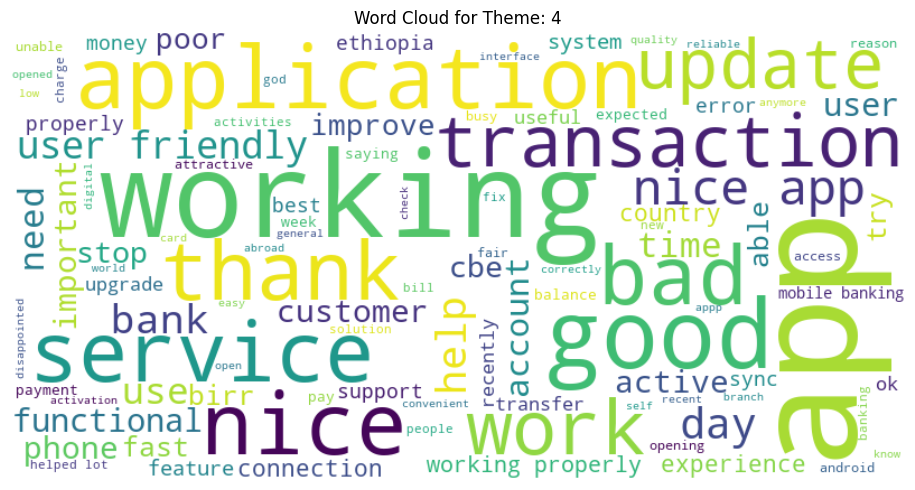

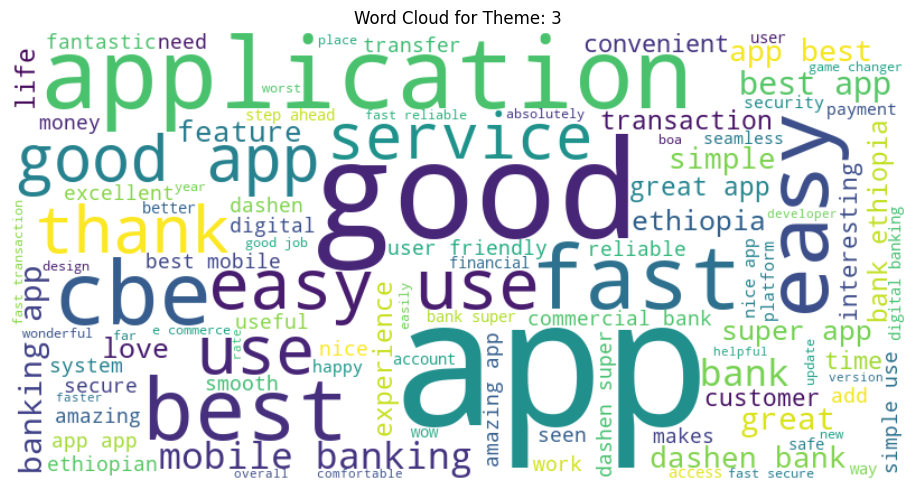

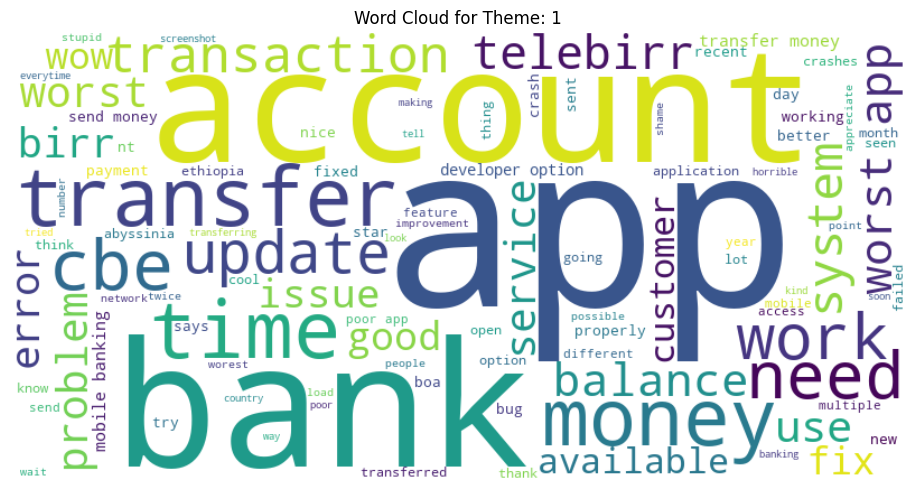

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure 'cleaned_text' or relevant cleaned column is used for word content
themes = df['assigned_topic'].dropna().unique()

for theme in themes:
    subset = df[df['assigned_topic'] == theme]
    text = " ".join(subset['cleaned_text'].dropna())

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=100
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Theme: {theme}")
    plt.tight_layout()
    plt.show()
